In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
nltk.download('stopwords')
df = pd.read_csv("blogs.csv")
print("Dataset Preview:")
print(df.head())

Dataset Preview:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [4]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)
    
df['cleaned_text'] = df['Data'].astype(str).apply(clean_text)
print("\nCleaned Text Preview:")
print(df[['Data', 'cleaned_text']].head())
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)


Cleaned Text Preview:
                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        cleaned_text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroup altath path cantaloupesrvcscmueducra...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altath talkreligion...  

Training size: 1600, Test size: 400


In [5]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.84


In [6]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.83      0.91      0.87        22
comp.sys.ibm.pc.hardware       0.86      0.76      0.81        25
   comp.sys.mac.hardware       0.78      0.86      0.82        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       1.00      0.67      0.80        18
               rec.autos       0.95      1.00      0.97        18
         rec.motorcycles       0.88      0.94      0.91        16
      rec.sport.baseball       0.86      1.00      0.92        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.72      0.81      0.76        16
                 sci.med       0.94      0.88     

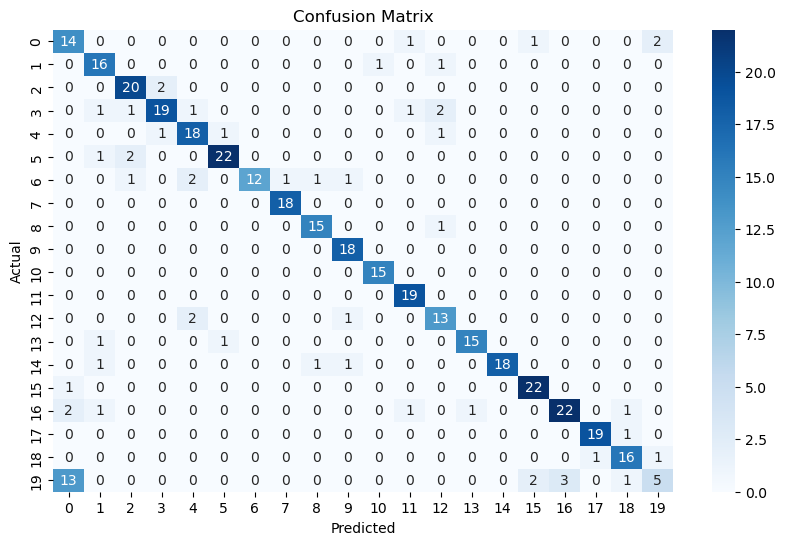

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)
print("\nSentiment Preview:")
print(df[['Data', 'Sentiment']].head())


Sentiment Preview:
                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


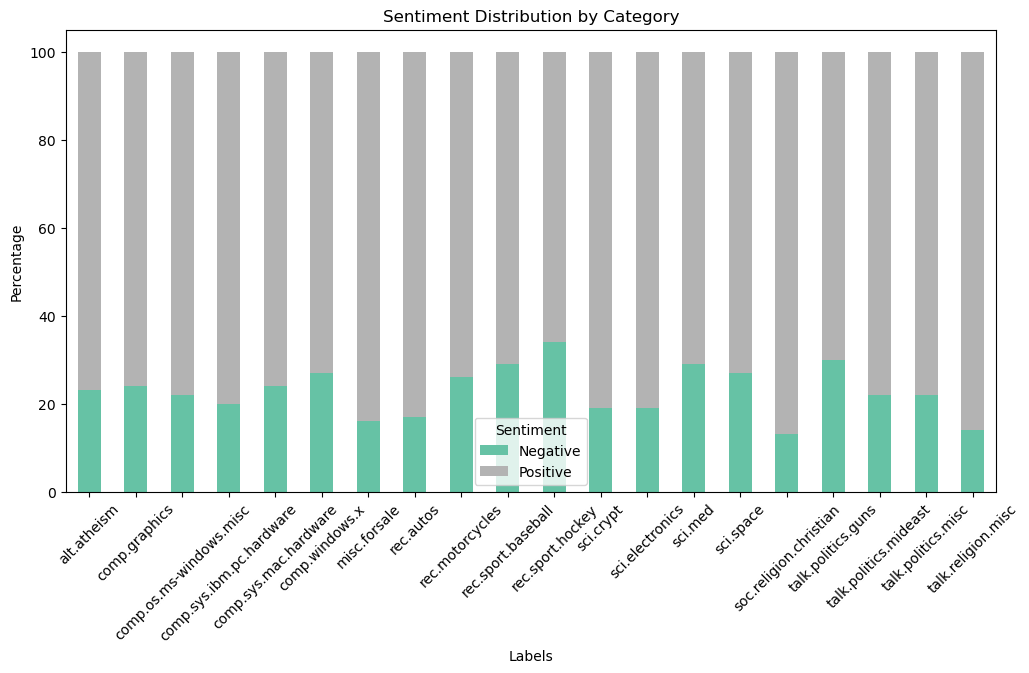

In [9]:
sentiment_dist = pd.crosstab(df['Labels'], df['Sentiment'], normalize='index') * 100
sentiment_dist.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title("Sentiment Distribution by Category")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

In [10]:
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nSentiment Summary:")
print(df['Sentiment'].value_counts())


Model Accuracy: 0.84

Sentiment Summary:
Positive    1543
Negative     457
Name: Sentiment, dtype: int64
